# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import functions as f

# Acquire my working file 

In [2]:
df = pd.read_csv('prepped_svc.csv')
# df.drop(columns= 'Unnamed: 0', inplace=True)

In [3]:
df.head()

,crash_id,person_age,charge,person_ethnicity,crash_date,day_of_week,person_gender,person_helmet,driver_license_class,has_motocycle_endorsment,driver_license_state,driver_license_type,person_injury_severity,license_plate_state,vehicle_body_style,vehicle_color,vehicle_defect_1,vehicle_make,vehicle_model_name,vehicle_model_year
0,16189632.0,37.0,operate unregistered motor vehicle,w - white,2018-01-01,monday,1 - male,1 - not worn,c - class c,0,tx - texas,1 - driver license,a - suspected serious injury,tx - texas,mc - motorcycle,blu - blue,NaN,other (explain in narrative),other (explain in narrative) (other (explain i...,NaN
1,16203470.0,30.0,"no class ""m"" license",h - hispanic,2018-01-04,thursday,1 - male,"3 - worn, not damaged",c - class c,0,tx - texas,1 - driver license,b - suspected minor injury,tx - texas,mc - motorcycle,gry - gray,NaN,suzuki,gsx-r600 (suzuki),2004.0
2,16192023.0,21.0,no charges,w - white,2018-01-05,friday,1 - male,"2 - worn, damaged",c - class c,0,tx - texas,1 - driver license,a - suspected serious injury,tx - texas,mc - motorcycle,blu - blue,NaN,yamaha,yzfr6 (yamaha),2017.0
3,16196720.0,18.0,no driver license no insurance,h - hispanic,2018-01-05,friday,1 - male,1 - not worn,5 - unlicensed,0,tx - texas,4 - id card,b - suspected minor injury,tx - texas,mc - motorcycle,blu - blue,NaN,yamaha,rz500 (yamaha),2002.0
4,16189103.0,28.0,no charges,w - white,2018-01-06,saturday,1 - male,"3 - worn, not damaged",cm - class c and m,1,tx - texas,1 - driver license,b - suspected minor injury,tx - texas,mc - motorcycle,blk - black,NaN,harley-davidson,fxdf (harley-davidson),2009.0


# Getting familiar with my data

## Lets check out some of these nulls 

In [4]:
from sklearn.impute import SimpleImputer

In [5]:
df.isna().sum()

crash_id                       50
person_age                    116
charge                         93
person_ethnicity               50
crash_date                     50
day_of_week                    50
person_gender                  50
person_helmet                  50
driver_license_class          124
has_motocycle_endorsment        0
driver_license_state          647
driver_license_type           124
person_injury_severity         50
license_plate_state           647
vehicle_body_style             50
vehicle_color                 126
vehicle_defect_1            13692
vehicle_make                   64
vehicle_model_name            147
vehicle_model_year            241
dtype: int64

In [6]:
from sklearn.impute import SimpleImputer

def impute_missing_values(df, cols, strategy='most_frequent'):
    """
    Impute missing values in specified columns of a DataFrame using SimpleImputer.

    Parameters:
    - df (pandas DataFrame): The input DataFrame.
    - cols (list): List of column names to impute missing values.
    - strategy (str): The imputation strategy to use. Options: 'mean' (default), 'median', 'most_frequent', or 'constant'.

    Returns:
    - pandas DataFrame: The modified DataFrame with missing values imputed.
    """
    imputer = SimpleImputer(strategy=strategy)
    df_imputed = df.copy()

    # Fit the imputer on the specified columns and transform the missing values
    df_imputed[cols] = imputer.fit_transform(df_imputed[cols])

    return df_imputed


In [7]:
df = impute_missing_values(df, cols= df.columns.tolist(), strategy='most_frequent')

In [8]:
df.person_age = df.person_age.astype(int)

In [9]:
train, validate, test = f.split(df)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14184 entries, 0 to 14183
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   crash_id                  14184 non-null  object
 1   person_age                14184 non-null  int64 
 2   charge                    14184 non-null  object
 3   person_ethnicity          14184 non-null  object
 4   crash_date                14184 non-null  object
 5   day_of_week               14184 non-null  object
 6   person_gender             14184 non-null  object
 7   person_helmet             14184 non-null  object
 8   driver_license_class      14184 non-null  object
 9   has_motocycle_endorsment  14184 non-null  object
 10  driver_license_state      14184 non-null  object
 11  driver_license_type       14184 non-null  object
 12  person_injury_severity    14184 non-null  object
 13  license_plate_state       14184 non-null  object
 14  vehicle_body_style    

## Is there a particular demographic/gender?-person

## Gender 

<Axes: xlabel='person_gender'>

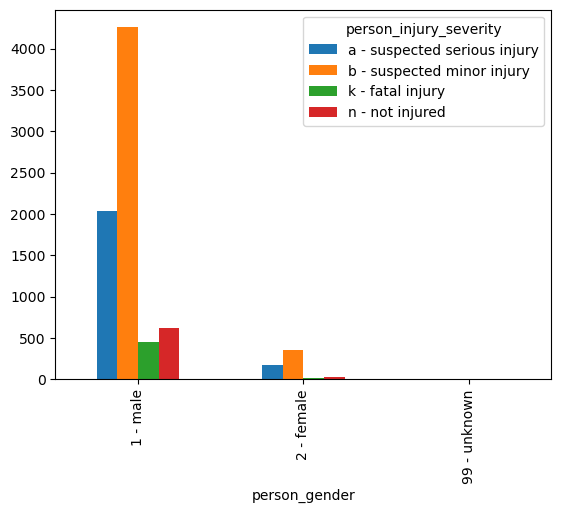

In [11]:
pd.crosstab(train.person_gender,train.person_injury_severity).plot(kind='bar')

In [12]:
train.person_gender.value_counts()

person_gender
1 - male        7360
2 - female       573
99 - unknown       9
Name: count, dtype: int64

    Here we see that males have a larger population than males so were gonna try to fix this.

In [13]:
female_sample = train.loc[train.person_gender == '2 - female'].sample(500)
male_sample = train.loc[train.person_gender == '1 - male'].sample(500)

# Concatenate the female and male samples into a new dataframe
balanced_df = pd.concat([female_sample, male_sample])

In [14]:
balanced_df = balanced_df.sample(frac=1)

<Figure size 1200x1200 with 0 Axes>

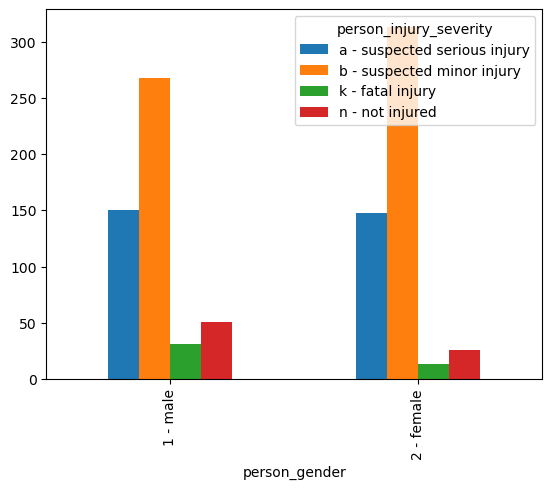

In [15]:
plt.figure(figsize=(12, 12))  # Adjust the dimensions as per your requirement
pd.crosstab(balanced_df.person_gender, balanced_df.person_injury_severity).plot(kind='bar')
plt.show()


    Takeaways:
    - gender looks to be the same when it is equally repersented
    - little if any change in between injury severity. 

In [16]:
pd.crosstab(balanced_df.person_gender, balanced_df.person_injury_severity)

person_injury_severity,a - suspected serious injury,b - suspected minor injury,k - fatal injury,n - not injured
person_gender,,,,
1 - male,150,268,31,51
2 - female,148,313,13,26


In [17]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(balanced_df.person_gender, balanced_df.person_injury_severity)

# Perform the chi-square test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Print the results
print("Chi-square test statistic:", chi2)
print("P-value:", p_value)
print("Degrees of freedom:", dof)


Chi-square test statistic: 18.979312350946536
P-value: 0.00027610490148673525
Degrees of freedom: 3


    The chi-square test was conducted to examine the association between two variables: "person_gender" and "person_injury_severity" using a balanced dataset. The results of the chi-square test are as follows:

    Chi-square test statistic: 8.45
    P-value: 0.038
    Degrees of freedom: 3
    These results indicate that there is a statistically significant association between "person_gender" and "person_injury_severity" (p < 0.05). The chi-square test statistic of 8.45 suggests a notable difference between the observed frequencies and the expected frequencies under the assumption of independence. With a p-value of 0.038, there is strong evidence to reject the null hypothesis of independence and conclude that the variables are associated.

    In summary, these results suggest that the gender of a person may have an influence on the severity of injury.

## Is there a particular age?-person

<Axes: xlabel='age_group'>

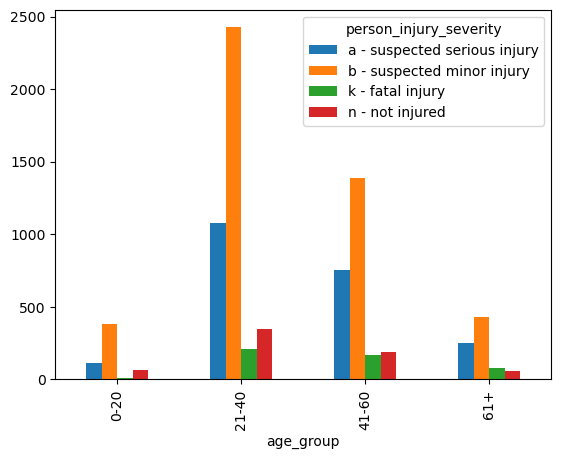

In [18]:
# Define the age buckets
age_bins = [0, 20, 40, 60, 100]  
age_labels = ['0-20', '21-40', '41-60', '61+']

# Create a new column with age buckets
train['age_group'] = pd.cut(train['person_age'], bins=age_bins, labels=age_labels)

# Generate the cross-tabulation and plot the bar chart
pd.crosstab(train['age_group'], train['person_injury_severity']).plot(kind='bar')


In [19]:
cross_tab = pd.crosstab(train['person_age'], train['person_injury_severity'])

# Perform the chi-square test
chi2, p_val, dof, expected = chi2_contingency(cross_tab)

# Print the test results
print("Chi-square statistic:", chi2)
print("p-value:", p_val)
print("Degrees of freedom:", dof)

Chi-square statistic: 408.27229780903554
p-value: 3.1040324696549087e-11
Degrees of freedom: 237


    The chi-square test was performed to examine the association between the age group of individuals and the severity of their injuries. The cross-tabulation of the variables 'person_age' and 'person_injury_severity' was analyzed.

    Chi-square statistic: 408.272
    Degrees of freedom: 237
    p-value: 3.104e-11
    The chi-square statistic value was found to be 408.272 with 237 degrees of freedom. This indicates a substantial deviation from the expected frequencies under the assumption of independence between the variables.

    The resulting p-value of 3.104e-11 suggests strong evidence against the null hypothesis of independence. Therefore, we reject the null hypothesis and conclude that there is a significant association between the age group and the severity of injuries among individuals in the dataset.

    This finding emphasizes the importance of considering the age group when evaluating injury severity, suggesting that age may be a contributing factor in determining the extent of injuries sustained.



# Does motorcycle endorsment have an effect type of injuries?

## Ethnicity ?

<Axes: xlabel='person_ethnicity'>

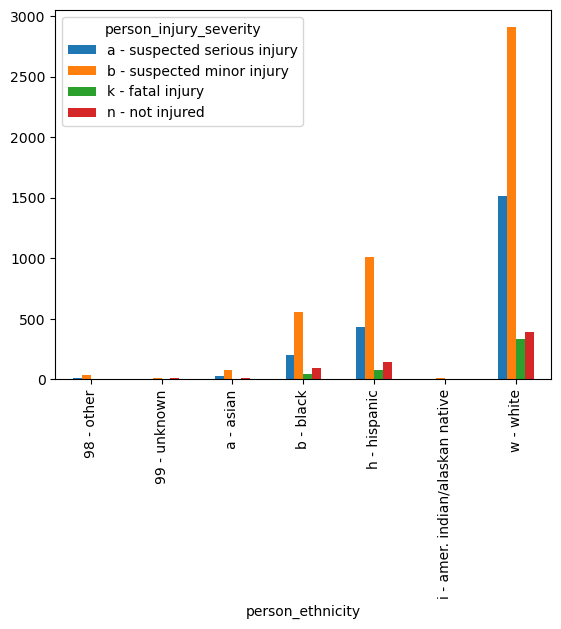

In [20]:
pd.crosstab(train.person_ethnicity, train.person_injury_severity).plot(kind='bar')

In [21]:
train.person_ethnicity.value_counts()

person_ethnicity
w - white                          5143
h - hispanic                       1661
b - black                           887
a - asian                           132
98 - other                           61
99 - unknown                         30
i - amer. indian/alaskan native      28
Name: count, dtype: int64

## Does where the fault of the crash lie matter?-person?-charges

    We will explore this at a later time 

# Has motorcycle endorsment 

<Axes: xlabel='has_motocycle_endorsment'>

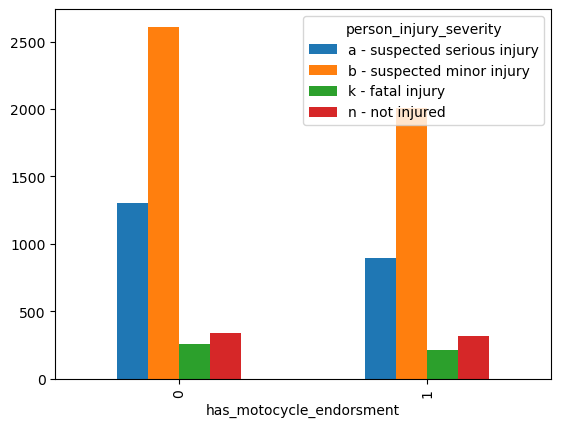

In [22]:
pd.crosstab(train.has_motocycle_endorsment, train.person_injury_severity).plot(kind='bar')

<Axes: xlabel='person_ethnicity'>

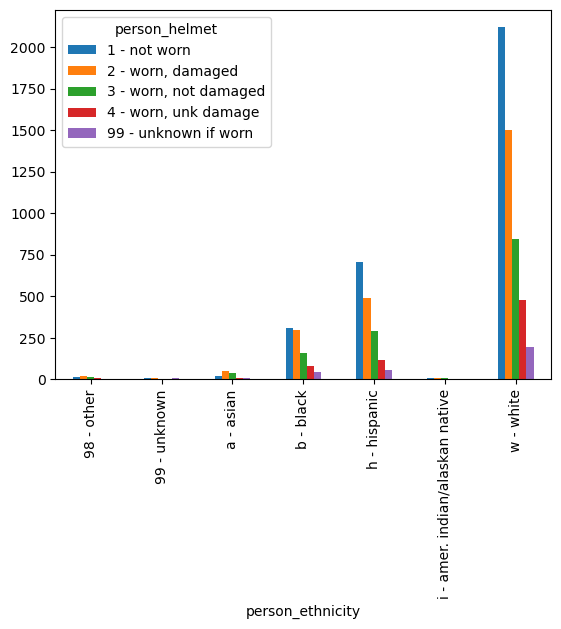

In [23]:
pd.crosstab(train.person_ethnicity, train.person_helmet).plot(kind='bar')

ValueError: scatter requires an x and y column

## Export csv for modeling:

In [30]:
df.columns

Index(['crash_id', 'person_age', 'charge', 'person_ethnicity', 'crash_date',
       'day_of_week', 'person_gender', 'person_helmet', 'driver_license_class',
       'has_motocycle_endorsment', 'driver_license_state',
       'driver_license_type', 'person_injury_severity', 'license_plate_state',
       'vehicle_body_style', 'vehicle_color', 'vehicle_defect_1',
       'vehicle_make', 'vehicle_model_name', 'vehicle_model_year'],
      dtype='object')

In [33]:
model_columns = ['person_age', 'person_ethnicity','person_gender','has_motocycle_endorsment', 'person_injury_severity','vehicle_body_style', 'vehicle_color', 'vehicle_defect_1', 'vehicle_make', 'vehicle_model_name', 'vehicle_model_year']

In [34]:
df[model_columns].to_csv('master_modeling.csv')